<a href="https://colab.research.google.com/github/meenakshiarya22/Coursera/blob/master/KNN_using_conversion_of_categorical_to_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/Iris.csv'

In [0]:
df=pd.read_csv(path)

In [0]:
df.info

In [8]:
df.describe
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [0]:
cleanup_nums = {"Species":     {"Iris-virginica": 1, "Iris-setosa": 2 , "Iris-versicolor":3}}

                

In [11]:
df.replace(cleanup_nums, inplace=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


In [0]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [31]:
Y=df['Species'].values
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=7)

In [35]:
neigh.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [36]:
yhat=neigh.predict(X_test)
yhat

array([2, 2, 3, 2, 1, 2, 1, 3, 3, 3, 3, 1, 3, 3, 2, 2, 1, 2, 1, 1, 2, 2,
       3, 3, 2, 1, 1, 3, 3, 3, 3, 1, 2, 2, 1, 1, 3, 3])

In [37]:
from sklearn.metrics import r2_score
score=r2_score(y_test,yhat)
score

0.6923076923076923

In [38]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,yhat)
MSE

0.21052631578947367

In [39]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,yhat)
acc

0.9473684210526315

In [40]:
n=neigh.predict([[3.0,1.2,7.8,9.0]])
n

array([1])

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yhat)
cm

array([[11,  0,  2],
       [ 0, 12,  0],
       [ 0,  0, 13]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


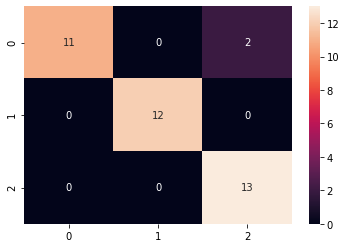

In [43]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [0]:
from sklearn.externals import joblib 
mymodel = joblib.dump(neigh,'mymodel.pkl')

In [45]:
mymodel

b'\x80\x03csklearn.neighbors._classification\nKNeighborsClassifier\nq\x00)\x81q\x01}q\x02(X\x0b\x00\x00\x00n_neighborsq\x03K\x07X\x06\x00\x00\x00radiusq\x04NX\t\x00\x00\x00algorithmq\x05X\x04\x00\x00\x00autoq\x06X\t\x00\x00\x00leaf_sizeq\x07K\x1eX\x06\x00\x00\x00metricq\x08X\t\x00\x00\x00minkowskiq\tX\r\x00\x00\x00metric_paramsq\nNX\x01\x00\x00\x00pq\x0bK\x02X\x06\x00\x00\x00n_jobsq\x0cNX\x07\x00\x00\x00weightsq\rX\x07\x00\x00\x00uniformq\x0eX\x0b\x00\x00\x00outputs_2d_q\x0f\x89X\x08\x00\x00\x00classes_q\x10cnumpy.core.multiarray\n_reconstruct\nq\x11cnumpy\nndarray\nq\x12K\x00\x85q\x13C\x01bq\x14\x87q\x15Rq\x16(K\x01K\x03\x85q\x17cnumpy\ndtype\nq\x18X\x02\x00\x00\x00i8q\x19K\x00K\x01\x87q\x1aRq\x1b(K\x03X\x01\x00\x00\x00<q\x1cNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x1db\x89C\x18\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00q\x1etq\x1fbX\x02\x00\x00\x00_yq h\x11h\x12K\x00\x85q!h\x14\x87q"Rq#(K\x01K&\x85q$h\x1b\x89B0\x01\x00\x00\x01\